In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx = pd.read_csv('./Training Data/Linear_X_Train.csv')
dfy = pd.read_csv('./Training Data/Linear_Y_Train.csv')
dfxtest = pd.read_csv('./Testing Data/Linear_X_Test.csv')

In [4]:
X_train = dfx.values.reshape((-1,))
Y_train = dfy.values.reshape((-1,))
X_test = dfxtest.values.reshape((-1,))
X_train

array([-0.28930742, -0.58880963,  1.02750749, ..., -0.30516366,
        1.67583291, -0.49175724])

In [5]:
def h(x, theta):
    return theta[0]*x + theta[1]

def grad(X, Y, theta):
    grad_ = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = h(X[i], theta)
        grad_[0] += (hx-Y[i])*X[i]
        grad_[1] += (hx-Y[i])
    return grad_

def error(X, Y, theta):
    err = 0
    m = X.shape[0]
    for i in range(m):
        hx = h(X[i], theta)
        err += (hx-Y[i])**2
    return err

def grad_dec(X, Y):
    theta = np.array([0.0, 0.0])
    err = []
    for i in range(100):
        gradient = grad(X, Y, theta)
        theta = theta - 0.0001*gradient
        err.append(error(X, Y, theta))
        
    return theta, err

In [6]:
theta, err = grad_dec(X_train, Y_train)

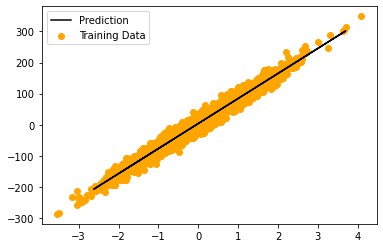

In [7]:
plt.scatter(X_train,Y_train,color = "orange", label='Training Data')
plt.plot(X_test, h(X_test,theta), color = "black", label="Prediction")
plt.legend()
plt.show()

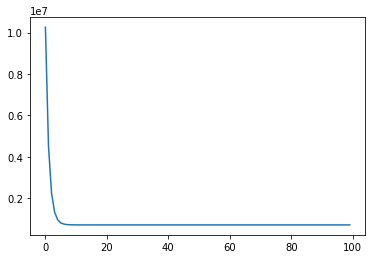

In [8]:
plt.plot(err)